# Nomor 1 Pretest : Water Dataset
**Background :** <br>
The Dataset provides the annual water usage in Baltimore from 1885 to 1963, or 79 years of data.<br>
The values are in the units of liters per capita per day, and there are 79 observations.

**Objective :** <br>
Create a python script for this Use Case.<br>
The Problem is to predict annual water usage.

## Load the Required Libraries

In [190]:
# For data loading and manipulation
from scipy import stats
import numpy as np
import pandas as pd

# For Visualization/EDA
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For data science and machine learning techniques
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## 1. Load the dataset and split into two, dataset.csv and validation.csv

In [259]:
#Load dataset
df=pd.read_csv('water.csv', sep=';')

In [156]:
df.head()

,Year,Water
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [157]:
df.tail()

,Year,Water
74,1959,594
75,1960,587
76,1961,587
77,1962,625
78,1963,613


In [158]:
#Dimension of the data
df.shape

(79, 2)

In [333]:
#Split data into two, 'dataset.csv' and 'validation.csv'
split_point = int(len(df)*0.7)
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

Dataset 55, Validation 24


In [334]:
dataset = pd.read_csv('dataset.csv')

In [335]:
valid = pd.read_csv('validation.csv')

Jawab :<br>
**Query yang dapat digunakan untuk load dan membagi data menjadi 2 bagian adalah seperti diatas**<br>
- Load dataset menggunakan pandas dataframe 'pd.read_csv'<br>
- Split into two sets of data dengan proporsi :

    1. 70% 'dataset.csv' yang berjumlah 55<br>
    2. 30% 'validation.csv' yang berjumlah 24

## 2. Create summary of the dataset

In [336]:
#Head of data (default =5): 5 baris pertama dari data
dataset.head()

,Year,Water
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [337]:
#Tail of data (default =5): 5 baris terakhir dari data
dataset.tail()

,Year,Water
50,1935,503
51,1936,515
52,1937,500
53,1938,522
54,1939,575


In [338]:
dataset.shape

(55, 2)

In [339]:
#Info tipe data, dimensi, memory, dll
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
Year     55 non-null int64
Water    55 non-null int64
dtypes: int64(2)
memory usage: 960.0 bytes


In [340]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [341]:
dataset.dtypes

Year     int64
Water    int64
dtype: object

In [342]:
#Fitur dalam data
print(dataset.columns)

Index(['Year', 'Water'], dtype='object')


In [343]:
dataset.isnull().sum()

Year     0
Water    0
dtype: int64

In [344]:
#Summarize seperti mean, min, max, jumlah, std dari kedua vairabel
dataset.describe()

,Year,Water
count,55.00000,55.000000
mean,1912.00000,476.254545
std,16.02082,60.823429
min,1885.00000,344.000000
25%,1898.50000,452.000000
50%,1912.00000,473.000000
75%,1925.50000,503.000000
max,1939.00000,662.000000


Jawab :<br>
**Summary dari dataset dapat dilihat menggunakan query-query diatas, summary ini berguna untuk memahami data (Data Understanding) terhadap data yang akan dianalisis agar menghasilkan analisis yang tepat dan sesuai.**<br>
**'Describe' adalah method yang paling umum untuk mengetahui langsung summary tentang data**<Br>
**Dapat disimpulkan bahwa data yang digunakan untuk membentuk model 'dataset'** :<Br>
- Setiap kolom ('Year' dan 'Water') bersifat integer <Br>
- Data memiliki dimensi (55, 2) yang artinya 55 rows dan 2 columns <br>
- Data berawal dari tahun 1885 hingga 1939<br>
- Data tidak memiliki missing value<br>
- Rata-rata 500 yang menunjukkan level data dalam analisis
- Standar deviasi yang menunjukkan nilai persebaran setiap titik diantara nilai mean yang sesuai.
- dsb.

## 3. Create a line plot of time series dataset will be iterated 

In [345]:
dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y')

In [346]:
dataset = dataset.set_index(dataset['Year'])
dataset.head()

,Year,Water
Year,,
1885-01-01,1885-01-01,356
1886-01-01,1886-01-01,386
1887-01-01,1887-01-01,397
1888-01-01,1888-01-01,397
1889-01-01,1889-01-01,413


In [347]:
dataset.drop(columns=['Year'], inplace=True)

In [348]:
dataset = dataset.astype('float64')

Text(0.5,1,'Annual Use of Water in Baltimore')

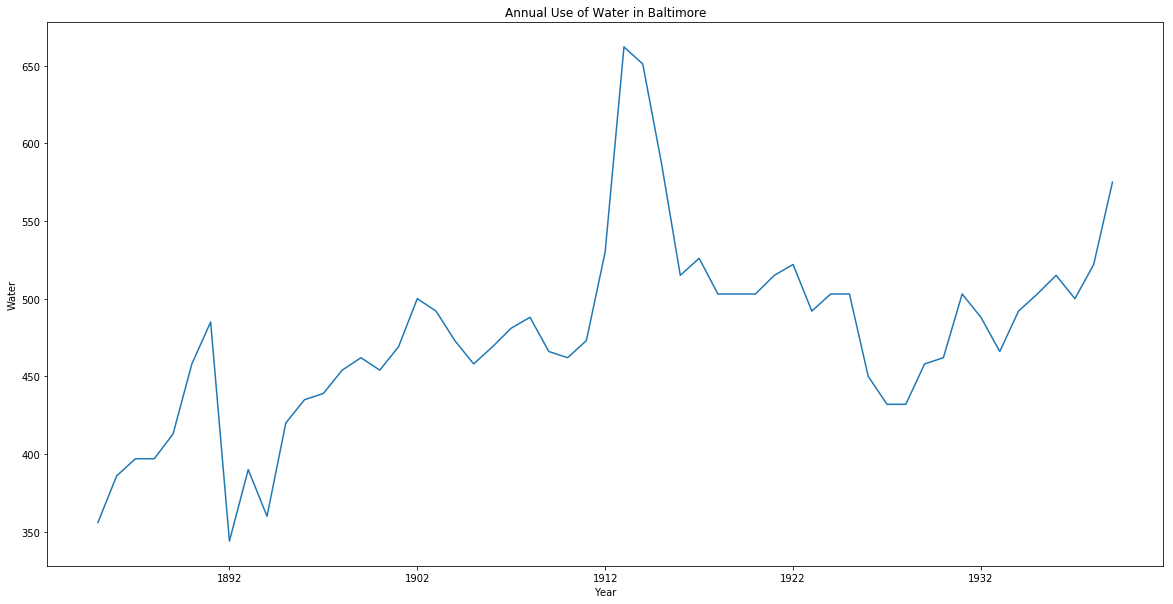

In [349]:
#Membuat Line Plot untuk time series data
rcParams['figure.figsize'] = (20, 10)

# Plot Graph
plt.xlabel('Year')
plt.ylabel('Water')
plt.plot(dataset['Water'])
plt.title('Annual Use of Water in Baltimore')

Jawab:<br>
**Membuat line plot time series dapat menggunakan fungsi plot dalam matplotlib library.**<br>
**Dari plot dapat dilihat bahwa selama +-80 tahun terjadi penggunaan air yang bersifat fluktuatif yang cenderung naik dari 10 tahun awal hingga tahun-tahun berikutnya dimana :**<br>
- Penggunaan air terbanyak adalah ketika tahun 1913 sebesar 662.<br>
- Penggunaan air tersedikit adalah ketika tahun 1892 sebesar 344.
- Tidak terlihat outlier yang jelas pada data walupun terjadi gap fluktuasi yang cukup curam di tahun 1892.

## 4. Group the annual data by decade and get an idea of the spread observation for each decade and how this may be changing

In [350]:
dataset = pd.read_csv('dataset.csv')

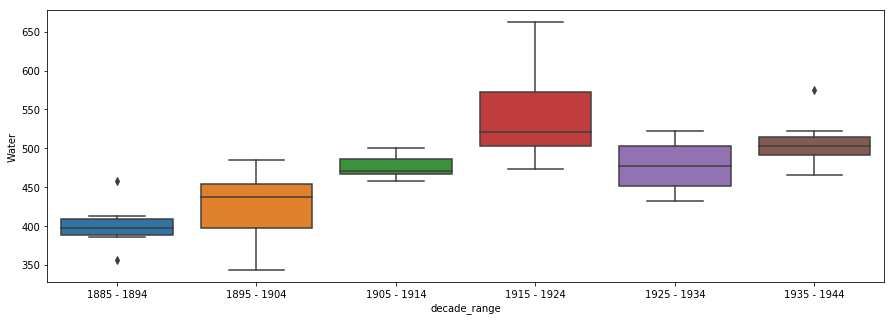

In [351]:
np.random.seed(99)
# df = pd.DataFrame({'year': sum([[x]*5 for x in range(1871,2015)], []),'AVG': abs(np.random.randn(720))/10})

# NEAREST 10 FOR DECADE START
dataset['decade'] = (dataset['Year'] // 10) * 10 + 5

# ADJUST FOR YEARS ENDING IN ZERO
dataset.loc[(dataset['Year'] % 10) == 0, 'decade'] = dataset['decade'] - 10

# CALCULATE DECADE RANGE
dataset['decade_range'] = dataset['decade'].astype('str') + ' - ' + \
                     (dataset['decade'] + 9).astype('str') 

plt.figure(figsize=(15,5))
sns.boxplot(x="decade_range", y="Water", data=dataset)   

plt.show()
plt.clf()
plt.close()

Jawab : <br>
**Pembagian decades dalam hal ini menggunakan boxplot**
**Dapat dilihat dengan pembagian per decades dalam 'dataset.csv' menjelaskan bahwa :**<br>
- Penggunaan air terbanyak adalah antara tahun 1915-1924
- Penggunaan air tersedikit adalah antara tahun 1885-1894

**Nilai median pada setiap decade menunjukkan trend yamg cenderung non linear yang artinya terjadi fluktuasi penggunaan air pada setiap rentang waktu 10 tahun.**<br>
**Terdapat penggunaan air yang cenderung stabil pada decades 1925-1934 yang ditunjukkan oleh boxplot warna ungu dimana Q1, Q2, dan Q3 cenderung berkelipatan sama dengan nilai max dan min yang sesuai.**<br>
**Dapat dilihat bahwa terdapat outlier pada decade 1885-1894 dan decade 1935-1944 yang artinya terdapat kelainan penggunaan dalam range waktu tersebut yang jauh dari penggunaan normal lainnya**

## 5. Create model using ARIMA
Dalam pemodelan ARIMA, data 'Year' harus dalam bentuk indeks. Maka, perlu untuk dijadikan indeks terlebih dahulu kemudia split data train dan test mengikuti instruksi soal.

In [352]:
dataset = pd.read_csv('dataset.csv')
dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y')
dataset = dataset.set_index(dataset['Year'])
dataset.drop(columns=['Year'], inplace=True)
dataset = dataset.astype('float64')

- Split the dataset into train and test sets directly

In [353]:
train_size = int(len(dataset)*0.5)
train_size

27

- The first 50% of the dataset will be held back to train the model <br>
- The last 50% of the dataset will be iterated and test the model

In [354]:
train = dataset[0:train_size]
test = dataset[train_size:]
print(train.shape)
print(test.shape)

(27, 1)
(28, 1)


In [355]:
train.head()

,Water
Year,
1885-01-01,356.0
1886-01-01,386.0
1887-01-01,397.0
1888-01-01,397.0
1889-01-01,413.0


## Modelling
- The ARIMA model (p,d,q) requires three parameters and is traditionally configured manually<br>
- Use an ARIMA(0,1,0) on the raw data may be a good starting point

In [360]:
arima_order = (0,1,0)
arima = ARIMA(train, order=arima_order)
arima_fit = arima.fit()
print(arima_fit.summary())

IndexError: list index out of range

**Dengan pembagian split data 'df' menjadi :<br>
    1. 70% 'dataset.csv' yang berjumlah 55<br>
    2. 30% 'validation.csv' yang berjumlah 24 <br>
dan pembagian train test 'dataset.csv' menjadi 50:50,
ARIMA(0,1,0) dalam model ini tidak dapat digunakan.**<BR>
**Maka, diperlukan untuk mengganti model ARIMA (p,d,q) dengan bantuan uji stationary, plot ACF, dan plot PACF**

Untuk mencari model ARIMA terbaik, parameter 'd' perlu dicari dengan melihat ke-stasioner-an data, yaitu sebagai berikut

In [384]:
#Determine Rolling Statistics
rolmean = pd.rolling_mean(train, window=12)
rolstd = pd.rolling_std(train, window=12)
print(rolmean, rolstd)

                 Water
Year                  
1885-01-01         NaN
1886-01-01         NaN
1887-01-01         NaN
1888-01-01         NaN
1889-01-01         NaN
1890-01-01         NaN
1891-01-01         NaN
1892-01-01         NaN
1893-01-01         NaN
1894-01-01         NaN
1895-01-01         NaN
1896-01-01  403.416667
1897-01-01  410.333333
1898-01-01  416.000000
1899-01-01  421.416667
1900-01-01  426.166667
1901-01-01  430.833333
1902-01-01  434.333333
1903-01-01  434.916667
1904-01-01  445.666667
1905-01-01  451.333333
1906-01-01  460.416667
1907-01-01  465.500000
1908-01-01  469.916667
1909-01-01  472.166667
1910-01-01  472.833333
1911-01-01  473.750000                 Water
Year                 
1885-01-01        NaN
1886-01-01        NaN
1887-01-01        NaN
1888-01-01        NaN
1889-01-01        NaN
1890-01-01        NaN
1891-01-01        NaN
1892-01-01        NaN
1893-01-01        NaN
1894-01-01        NaN
1895-01-01        NaN
1896-01-01  41.810087
1897-01-01  40.082491
189

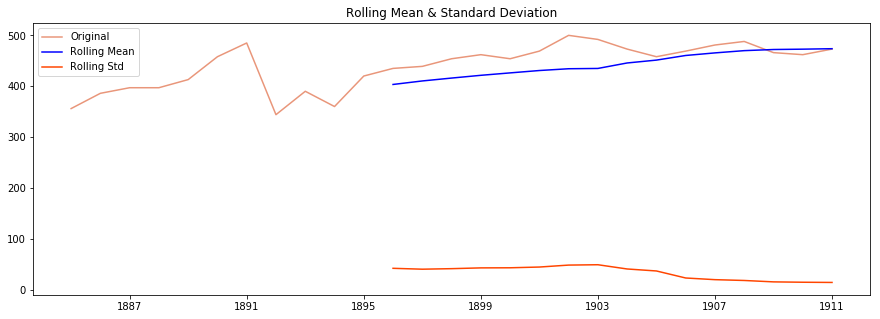

In [385]:
#Plot Rolling Statistics:
plt.figure(figsize=(15,5))
orig = plt.plot(train, color='darksalmon',label='Original')
mean = plt.plot(rolmean, color='blue', label='Rolling Mean')
std = plt.plot(rolstd, color='orangered', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Dari plot diatas dapat dilihat jika data stasioner dengan rata-rata namun tidak dengan ragam karena tidak setara dengan data. Oleh, karena itu perlu dilakukan uji hipotesis stasioner secara ragam dengan Dickey-Fuller test

In [389]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(train['Water'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
  
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -2.689200
p-value                         0.075926
#Lags Used                      0.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


**Dengan uji hipotesis, dapat dilihat dari hasil diatas bahwa:**<br>
**H0 : Not Stationary** <br>
**H1 : Stationary** <br>
**Maka dapat disimpulkan :** <br>
**p-value : 0.07 > alpha : 0.05**<br>
  =>Tak tolak H0<br>
**Maka, 'dataset' bersifat tidak stasioner dan parameter d!=0 -> Model menjadi = ARIMA(p,d,q)**

Untuk mencari model ARIMA terbaik, parameter 'p' dan 'q' perlu dicari dengan melihat plot ACF dan plot PACF, yaitu sebagai berikut

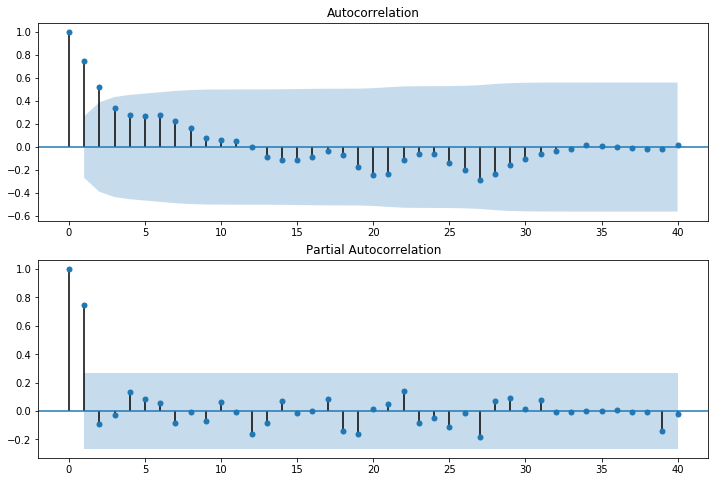

In [358]:
#ACF and PACF plots:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataset['Water'][1:], lags=40, ax=ax1)   # first value of diff is NaN
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataset['Water'][1:], lags=40, ax=ax2)

**Dapat dilihat dalam plot ACF bahwa tidak ada seasonal effect, maka dapat diasumsikan ACF=order 'q' != '0'.**<br>
**Sementara, pada plot PACF dapat dilihat bahwa terdapat lag = 1, maka order 'q' = 1.**<br>
**Maka, model ARIMA (p,d,q) dapat menjadi : ARIMA(1,1,1) / ARIMA(1,2,1) / dan lain-lain**

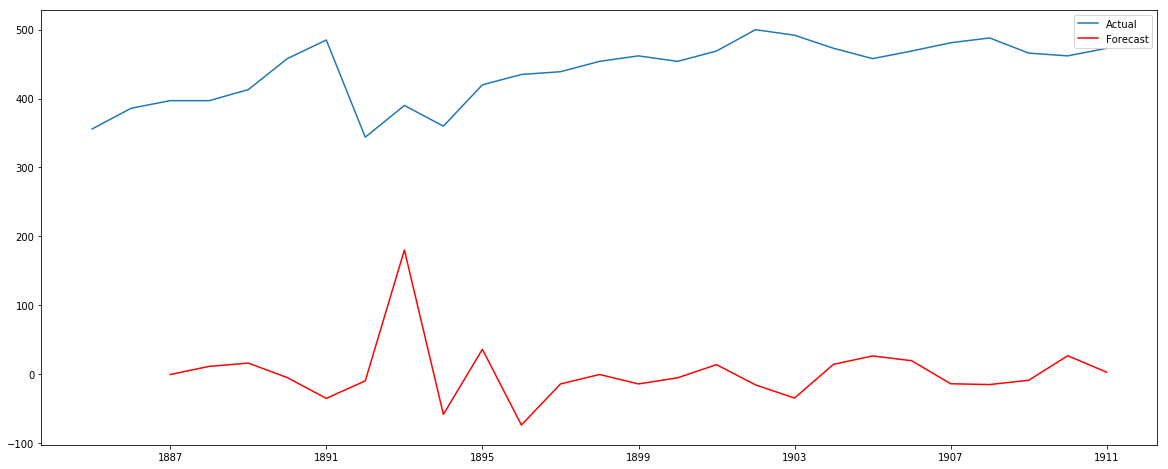

In [413]:
# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(train, order=(1,2,1)) 
ax = plt.gca()
results = model.fit()
#Plot Fitting Model : Prediksi vs Aktual
plt.plot(train['Water'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Actual', 'Forecast'])

In [414]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 264.7569  
Dependent Variable: D2.Water         Log-Likelihood:      -125.94   
Date:               2019-10-10 16:19 Scale:               1.0000    
No. Observations:   25               Method:              css-mle   
Df Model:           3                Sample:              01-01-1887
Df Residuals:       22                                    01-01-1911
Converged:          1.0000           S.D. of innovations: 34.552    
AIC:                259.8814         HQIC:                261.234   
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            -0.4565    0.7256  -0.6292  0.5357  -1.8786   0.9656
ar.L1.D2.Water   -0.2772    0.1897  -1.4610  0.1582  -0.6490   0.0947
ma.L1.D2.Water   -1.0000    0.1095  -9.1353  0.0000  -1.2145  -0.7855
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -3.6078             0.0000           3.6078             0.5000
MA.1            1.0000             0.0000           1.0000             0.0000
====================================================================

"""

- When model trained, a one-step prediction made ang the prediction stored for later evaluation.<br>
- The actual observation from the test dataset will be added to the training dataset for the next iteration.<br>

## Prediction Analysis
- The predictions made during the enumeration of the test dataset will be evaluated and an RMSE score reported.

In [415]:
#Nilai prediksi dari model
y_pred = arima_fit.forecast(len(test))[0]
df_test = pd.DataFrame(y_pred, columns=['prediksi'], index=test.index)
df_test['aktual'] = test.values
df_test

,prediksi,aktual
Year,,
1912-01-01,579.135605,530.0
1913-01-01,581.157990,662.0
1914-01-01,583.049825,651.0
1915-01-01,584.895193,587.0
1916-01-01,586.697661,515.0
1917-01-01,588.457378,526.0
1918-01-01,590.174353,503.0
1919-01-01,591.848584,503.0
1920-01-01,593.480073,503.0


In [416]:
mse = mean_squared_error(df_test['aktual'], df_test['prediksi'])
rmse = np.sqrt(mse)
rmse

107.06161382251537

**Dapat dilihat dari plot bahwa hasil prediksi dan aktual sangat jauh berbeda dan bahkan tidak dapat disamakan.**<br> 
**Dapat dilihat juga bahwa nilai RMSE = 107.06 yang mengindikasikan bahwa nilai error yang dihasilkan terlalu besar dan mengindikasikan model ini bukanlah model terbaik.**<br>
**Hal ini dapat disebabkan antara lain karena:**<br>
1. Train Test Split data yang tidak sebanding yaitu 50:50
2. Jumlah data yang kurang banyak sehingga tidak dapat memberikan hasil analisis yang terbaik
3. Kurangnya analisis lebih lanjut terkait kombinasi model ARIMA dengan parameter terbaik

## 6. Calculate the RMSE using the helper function from the scikit-learn library, from dataset only
- Those RMSE will show you on average, how much the error/the model was wrong/gap between predection and expected value per capita per day for each prediction made.

In [425]:
valid = pd.read_csv('validation.csv')
valid['Year'] = pd.to_datetime(valid['Year'], format='%Y')
valid = valid.set_index(valid['Year'])
valid.drop(columns=['Year'], inplace=True)
valid = valid.astype('float64')
valid.head()

,Water
Year,
1940-01-01,583.0
1941-01-01,587.0
1942-01-01,628.0
1943-01-01,640.0
1944-01-01,609.0


In [419]:
dataset.head()

,Water
Year,
1885-01-01,356.0
1886-01-01,386.0
1887-01-01,397.0
1888-01-01,397.0
1889-01-01,413.0


In [420]:
arima_order = (1,2,1)
arima = ARIMA(dataset, order=arima_order)
arima_fit = arima.fit()
print(arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Water   No. Observations:                   53
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -269.617
Method:                       css-mle   S.D. of innovations             37.763
Date:                Thu, 10 Oct 2019   AIC                            547.233
Time:                        16:20:26   BIC                            555.114
Sample:                    01-01-1887   HQIC                           550.264
                         - 01-01-1939                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0427      0.344     -0.124      0.901      -0.716       0.631
ar.L1.D2.Water     0.0424      0.141      0.302      0.764      -0.233       0.318
ma.L1.D2.Water    -1.0000      0.052

In [423]:
#Nilai prediksi dari validation
y_pred = arima_fit.forecast(len(valid))[0]
df_valid = pd.DataFrame(y_pred, columns=['prediksi'], index=valid.index)
df_valid['aktual'] = valid.values
df_valid

,prediksi,aktual
Year,,
1940-01-01,579.135605,583.0
1941-01-01,581.157990,587.0
1942-01-01,583.049825,628.0
1943-01-01,584.895193,640.0
1944-01-01,586.697661,609.0
1945-01-01,588.457378,606.0
1946-01-01,590.174353,632.0
1947-01-01,591.848584,617.0
1948-01-01,593.480073,613.0


In [427]:
mse = mean_squared_error(df_valid['aktual'], df_valid['prediksi'])
rmse = np.sqrt(mse)
rmse

29.854599975326327

## Kesimpulan : 

Dari hasil analisis diatas dapat dilihat bahwa model ARIMA terbaik adalah **ARIMA = (1,2,1)** <br>
dengan :<bR>
Hasil RMSE pada model adalah **107.06**<br>
Hasil RMSE pada validation adalah **29.85**<br>
Dari hasil RMSE tersebut dapat dilihat bahwa model bukan merupakan yang terbaik saat dilakukan testing dengan model 'dataset.csv' namun saat memprediksi data valid 'validation.csv' model lumayan memberikan hasil yang lebih baik. Dalam hal ini, dapat disimpulkan bahwa model ini bukan merupakan model terbaik, namun dapat digunakan untuk beberapa data dengan kondisi tertentu.<br>
Walau begitu model ARIMA dapat digunakan untuk memprediksi data namun tidak dengan akurasi yang tinggi ataupun error yang rendah.<br>
